In [46]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import calendar

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.linear_model import LassoCV, LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
import joblib # for saving models

import warnings
warnings.filterwarnings("ignore")

# Configure display settings
pd.set_option('display.max_columns', None)

In [2]:
# Load dataset
df = pd.read_csv("/Users/vishalhooda/Downloads/air_quality.csv")
print(f"Shape of the Dataset: {df.shape}")
df.head(10)

Shape of the Dataset: (5882208, 25)


,date,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,pm2.5,no2,nox,no,windspeed,winddirec,unit,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
0,2024-08-31 23:00,Hukou,Hsinchu County,62.0,PM2.5,Moderate,0.9,0.17,35.0,40.2,18.0,17.0,2.3,2.6,0.3,2.3,225,NaN,0.2,20.1,26.0,1.0,121.038869,24.900097,22.0
1,2024-08-31 23:00,Zhongming,Taichung City,50.0,NaN,Good,1.6,0.32,27.9,35.1,27.0,14.0,7.6,9.3,1.6,1.1,184,NaN,0.2,15.3,23.0,1.0,120.641092,24.151958,31.0
2,2024-08-31 23:00,Zhudong,Hsinchu County,45.0,NaN,Good,0.4,0.17,25.1,40.6,21.0,13.0,2.9,4.1,1.1,0.4,210,NaN,0.2,13.8,24.0,0.0,121.088955,24.740914,23.0
3,2024-08-31 23:00,Hsinchu,Hsinchu City,42.0,NaN,Good,0.8,0.2,30.0,35.9,19.0,10.0,4.0,4.8,0.7,1.9,239,NaN,0.2,13.0,26.0,1.0,120.972368,24.805636,24.0
4,2024-08-31 23:00,Toufen,Miaoli County,50.0,NaN,Good,1.0,0.16,33.5,35.9,18.0,14.0,1.8,3.1,1.2,1.8,259,NaN,0.1,15.3,28.0,1.0,120.898693,24.696907,25.0
5,2024-08-31 23:00,Miaoli,Miaoli County,40.0,NaN,Good,1.1,0.17,35.2,35.0,15.0,12.0,4.0,5.1,1.1,1.4,235,NaN,0.1,12.2,17.0,1.0,120.820115,24.564992,26.0
6,2024-08-31 23:00,Sanyi,Miaoli County,39.0,NaN,Good,0.9,0.18,35.3,42.9,14.0,9.0,2.4,3.1,0.7,0.6,203,NaN,0.1,11.4,16.0,0.0,120.759568,24.382484,27.0
7,2024-08-31 23:00,Fengyuan,Taichung City,44.0,NaN,Good,1.3,0.24,24.6,39.7,21.0,12.0,6.8,7.3,0.5,1.2,38,NaN,0.2,13.5,21.0,1.0,120.742524,24.256997,28.0
8,2024-08-31 23:00,Shalu,Taichung City,46.0,NaN,Good,2.5,0.2,30.3,40.4,33.0,16.0,7.3,7.7,0.3,0.5,8,NaN,0.1,14.2,26.0,1.0,120.568794,24.225628,29.0
9,2024-08-31 23:00,Dali,Taichung City,49.0,NaN,Good,0.7,0.24,29.4,37.0,20.0,12.0,5.6,6.3,0.7,0.9,97,NaN,0.2,15.1,21.0,0.0,120.678444,24.099611,30.0


In [3]:
# Check column information and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5882208 entries, 0 to 5882207
Data columns (total 25 columns):
 #   Column     Dtype  
---  ------     -----  
 0   date       object 
 1   sitename   object 
 2   county     object 
 3   aqi        float64
 4   pollutant  object 
 5   status     object 
 6   so2        object 
 7   co         object 
 8   o3         object 
 9   o3_8hr     object 
 10  pm10       object 
 11  pm2.5      object 
 12  no2        object 
 13  nox        object 
 14  no         object 
 15  windspeed  object 
 16  winddirec  object 
 17  unit       float64
 18  co_8hr     object 
 19  pm2.5_avg  object 
 20  pm10_avg   object 
 21  so2_avg    object 
 22  longitude  float64
 23  latitude   float64
 24  siteid     float64
dtypes: float64(5), object(20)
memory usage: 1.1+ GB


In [4]:
# Check duplicate values
df.duplicated().sum()

0

In [5]:
# Check for missing values
missing_summary = pd.DataFrame({
    'Columns': df.columns,
    'Missing Values': df.isnull().sum().values,
    '% of Missing Values': (df.isnull().mean().values * 100).round(2)
})
missing_summary = missing_summary[missing_summary['Missing Values'] > 0].sort_values('% of Missing Values', ascending = False).reset_index(drop = True)
missing_summary

,Columns,Missing Values,% of Missing Values
0,unit,5882208,100.00
1,pollutant,3235012,55.00
2,siteid,1779469,30.25
3,latitude,933620,15.87
4,longitude,933620,15.87
5,so2_avg,629162,10.70
6,winddirec,219736,3.74
7,windspeed,219498,3.73
8,nox,169124,2.88
9,no,169455,2.88


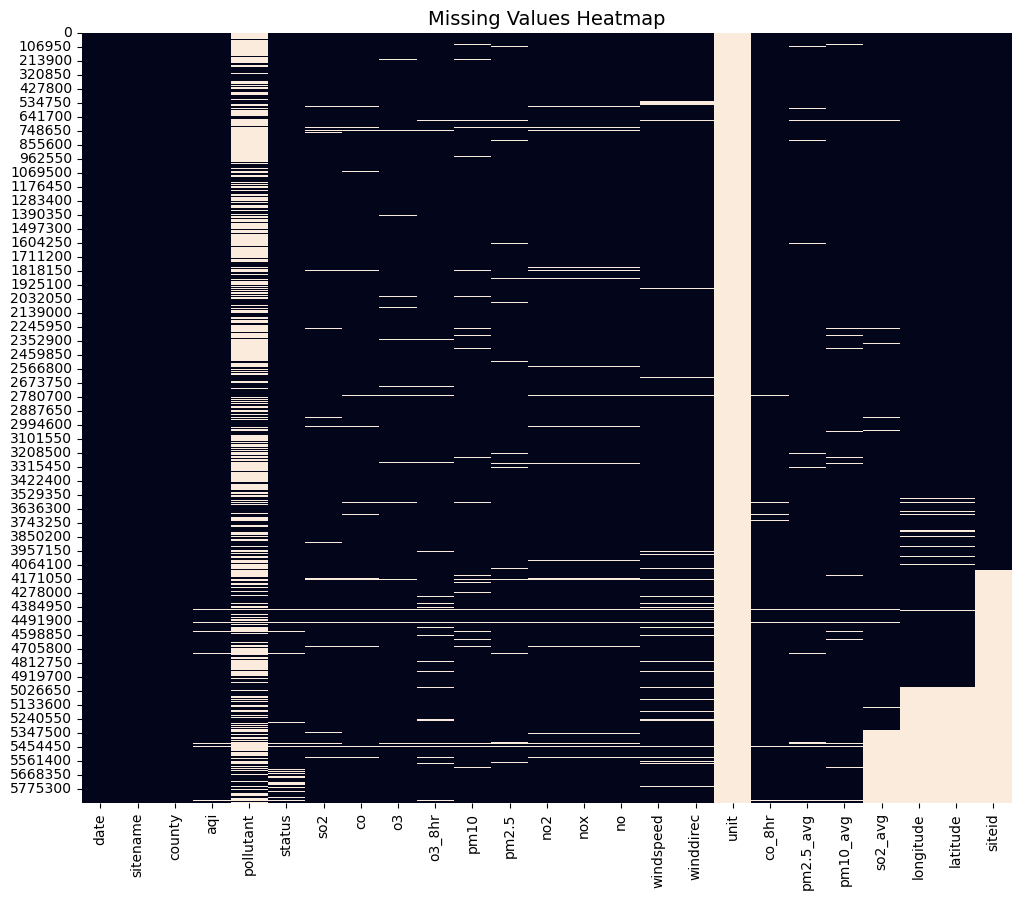

In [6]:
# Visualize missingness
plt.figure(figsize = (12, 10))
sns.heatmap(df.isnull(), cbar = False)
plt.title("Missing Values Heatmap", fontsize = 14)
plt.show()

In [7]:
df.drop(columns = ['unit', 'pollutant'], inplace = True)

In [8]:
# Count unique stations
print("Number of Monitoring Stations:", df['sitename'].nunique())

Number of Monitoring Stations: 123


In [9]:
# Count unique counties
print("Number of counties:", df['county'].nunique())
df['county'].value_counts()

Number of counties: 22


county
New Taipei City      898819
Kaohsiung City       888497
Taipei City          503766
Taoyuan City         448718
Taichung City        367033
Tainan City          366827
Pingtung County      305495
Changhua County      293423
Yunlin County        287491
Miaoli County        219683
Nantou County        216420
Yilan County         147071
Chiayi County        143986
Hsinchu County       143846
Taitung County       143809
Hsinchu City          75850
Lienchiang County     71914
Keelung City          71913
Kinmen County         71913
Chiayi City           71912
Hualien County        71912
Penghu County         71910
Name: count, dtype: int64

In [10]:
# Convert date column 
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

# Display date range 
print("Date Range:")
print(f"From: {df['date'].min()} To: {df['date'].max()}")

Date Range:
From: 2016-11-25 13:00:00 To: 2024-08-31 23:00:00


In [11]:
# List of columns to convert
cols_to_convert = ['so2', 'co',
       'o3', 'o3_8hr', 'pm10', 'pm2.5', 'no2', 'nox', 'no', 'windspeed',
       'winddirec', 'co_8hr', 'pm2.5_avg', 'pm10_avg', 'so2_avg']

# Function to clean and convert values
def safe_to_float(x):
    try:
        # Remove commas or unwanted characters
        x = str(x).replace(',', '').strip()
        # Replace invalid values with Nan
        if x in ['NR', 'NA', 'N/A', '-', '', 'nan']:
            return np.nan
        return float(x)
    except: 
        return np.nan

# Apply the conversion
for col in cols_to_convert:
    if col in df.columns:
        df[col] = df[col].apply(safe_to_float)

In [12]:
# Summary of numeric columns
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,5882123,2020-11-22 10:44:46.298467328,2016-11-25 13:00:00,2019-02-06 01:00:00,2021-01-29 23:00:00,2022-09-07 17:00:00,2024-08-31 23:00:00,NaN
aqi,5839188.0,54.192768,-1.0,32.0,46.0,70.0,500.0,29.858638
so2,5742417.0,1.994126,-999.0,1.0,1.7,2.5,255.4,1.875789
co,5728077.0,0.338632,-999.0,0.19,0.29,0.41,38.58,1.207092
o3,5674782.0,30.420445,-999.0,16.0,28.3,42.0,410.0,18.353466
o3_8hr,5728560.0,30.348388,-1.0,18.0,29.0,41.0,135.8,15.850359
pm10,5735555.0,34.382267,-999.0,18.0,28.0,45.0,1407.0,24.294737
pm2.5,5679983.0,16.845447,-999.0,8.0,14.0,23.0,1000.0,12.719843
no2,5716208.0,11.251926,-27.78,5.0,9.0,15.0,351.05,8.678853
nox,5713061.0,14.716442,-1.6,6.2,10.8,18.0,431.0,14.882883


In [13]:
numeric_cols = ['aqi','so2', 'co',
       'o3', 'o3_8hr', 'pm10', 'pm2.5', 'no2', 'nox', 'no', 'windspeed',
        'co_8hr', 'pm2.5_avg', 'pm10_avg', 'so2_avg']
for col in numeric_cols:
    if col in df.columns:
        neg_values = (df[col] < 0).sum()
        print(f"{col}: {neg_values} negative values")

aqi: 7391 negative values
so2: 8028 negative values
co: 412 negative values
o3: 478 negative values
o3_8hr: 50 negative values
pm10: 2 negative values
pm2.5: 3 negative values
no2: 1029 negative values
nox: 160 negative values
no: 29470 negative values
windspeed: 72 negative values
co_8hr: 35 negative values
pm2.5_avg: 6 negative values
pm10_avg: 6 negative values
so2_avg: 12 negative values


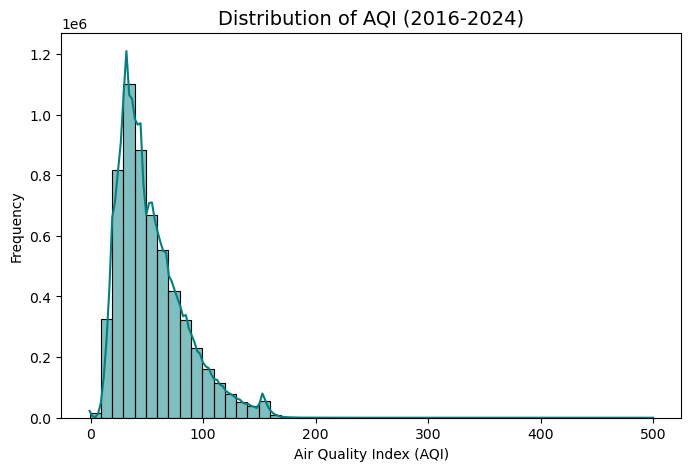

In [14]:
# AQI Distribution
plt.figure(figsize = (8, 5))
sns.histplot(df['aqi'], bins = 50, kde = True, color = 'teal')
plt.title("Distribution of AQI (2016-2024)", fontsize = 14)
plt.xlabel("Air Quality Index (AQI)")
plt.ylabel("Frequency")
plt.show()

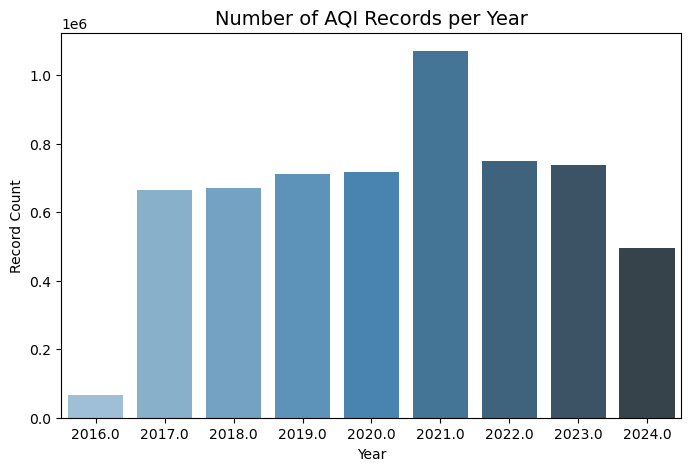

In [15]:
# Records per year
df['year'] = df['date'].dt.year
records_per_year = df['year'].value_counts().sort_index()

plt.figure(figsize = (8, 5))
sns.barplot(x = records_per_year.index, y = records_per_year.values, palette = 'Blues_d')
plt.title("Number of AQI Records per Year", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Record Count")
plt.show()

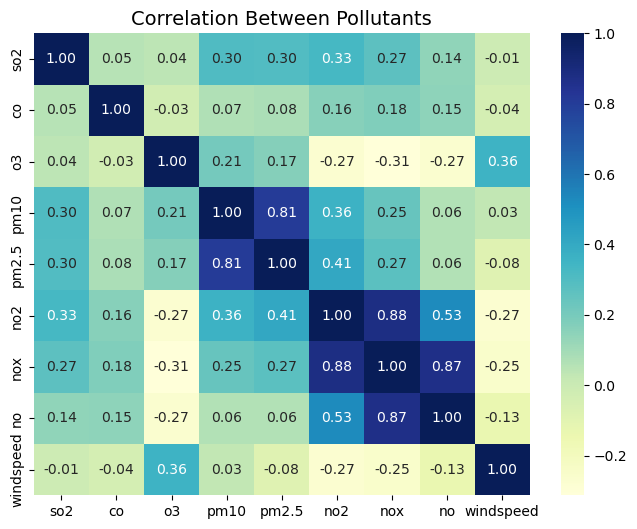

In [16]:
# Correlation Between Pollutants
pollutant_cols = ['so2', 'co', 'o3', 'pm10', 'pm2.5', 'no2', 'nox', 'no', 'windspeed']
corr = df[pollutant_cols].corr()
plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True, cmap = 'YlGnBu', fmt = '.2f')
plt.title("Correlation Between Pollutants", fontsize = 14)
plt.show()

In [17]:
# Fill latitude, longitude, siteid based on station
for col in ['siteid', 'latitude', 'longitude']:
    if col in df.columns:
        df[col] = df.groupby('sitename')[col].transform(lambda x: x.ffill().bfill())

In [18]:
# Drop rows where date is missing (NaT)
missing_dates = df['date'].isna().sum()
print(f"Dropping {missing_dates} rows with invalid/missing dates.")
df = df.dropna(subset = ['date'])

# Sort and set date as index
df = df.sort_values('date').set_index('date')

# Interpolate missing numeric values with time method
numeric_cols = df.select_dtypes(include = [np.number]).columns
df[numeric_cols] = df[numeric_cols].interpolate(method = 'time')

# Fill any remaining NaN (edge cases) with median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

Dropping 85 rows with invalid/missing dates.


In [19]:
df['aqi'] = pd.to_numeric(df['aqi'], errors = 'coerce')

In [20]:
df['status'].value_counts(dropna = False)

status
Good                              3185127
Moderate                          2159137
Unhealthy for Sensitive Groups     343909
NaN                                142718
Unhealthy                           51008
Very Unhealthy                        173
Hazardous                              51
Name: count, dtype: int64

In [21]:
def classify_aqi(aqi):
    if pd.isna(aqi):
        return np.nan
    elif aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <=150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

# Fill missing statuses based on AQI values
df.loc[df['status'].isna(), 'status'] = df.loc[df['status'].isna(), 'aqi'].apply(classify_aqi)

# Check remaining missing
print("Missing status after AQI-based fill:", df['status'].isna().sum())

Missing status after AQI-based fill: 0


In [22]:
# Select only relevent numeric columns for outlier detection
numeric_cols = [
    'so2', 'co', 'o3', 'o3_8hr', 'pm10', 'pm2.5', 'no2', 'nox', 'no',
    'windspeed', 'winddirec', 'co_8hr', 'pm2.5_avg', 'pm10_avg', 'so2_avg', 'aqi'
]

df_numeric = df[numeric_cols].copy()

z_scores = np.abs(stats.zscore(df_numeric, nan_policy = 'omit'))
outlier_threshold = 3

# Create a DataFrame of outlier counts
z_outliers = (z_scores > outlier_threshold).sum(axis = 0)

# Combine into a summary table
z_outlier_summary = pd.DataFrame({
    'Column': df_numeric.columns,
    'Z-Score Outliers': z_outliers.values
}).sort_values(by = 'Z-Score Outliers', ascending = False)

display(z_outlier_summary)

,Column,Z-Score Outliers
7,nox,119534
9,windspeed,117924
8,no,114439
6,no2,96003
5,pm2.5,91777
11,co_8hr,90394
15,aqi,89393
12,pm2.5_avg,82561
4,pm10,78515
13,pm10_avg,77358


In [23]:
iqr_outliers = {}
for col in df_numeric.columns:
    Q1 = df_numeric[col].quantile(0.25)
    Q3 = df_numeric[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    iqr_outliers[col] = ((df_numeric[col] < lower_bound) | (df_numeric[col] > upper_bound)).sum()

iqr_outlier_summary = pd.DataFrame({
    'Column': df_numeric.columns,
    'IQR Outliers': iqr_outliers.values()
}).sort_values(by = 'IQR Outliers', ascending = False)

display(iqr_outlier_summary)

,Column,IQR Outliers
8,no,653493
14,so2_avg,381498
7,nox,374339
1,co,290311
0,so2,278653
9,windspeed,276272
5,pm2.5,242716
11,co_8hr,238987
6,no2,238432
4,pm10,221230


In [24]:
outlier_summary = pd.merge(
    z_outlier_summary, 
    iqr_outlier_summary,
    on = 'Column',
    how = 'outer'
)

# Calculate percentage of outliers
outlier_summary['% Z-Score Outliers'] = (outlier_summary['Z-Score Outliers'] / len(df)) * 100
outlier_summary['% IQR Outliers'] = (outlier_summary['IQR Outliers'] / len(df)) * 100

# Round to 2 decimal places
outlier_summary['% Z-Score Outliers'] = outlier_summary['% Z-Score Outliers'].round(2)
outlier_summary['% IQR Outliers'] = outlier_summary['% IQR Outliers'].round(2)

# Display sorted summary
display(outlier_summary.sort_values(by = '% IQR Outliers', ascending = False).reset_index(drop = True))

,Column,Z-Score Outliers,IQR Outliers,% Z-Score Outliers,% IQR Outliers
0,no,114439,653493,1.95,11.11
1,so2_avg,53313,381498,0.91,6.49
2,nox,119534,374339,2.03,6.36
3,co,754,290311,0.01,4.94
4,so2,66822,278653,1.14,4.74
5,windspeed,117924,276272,2.00,4.70
6,pm2.5,91777,242716,1.56,4.13
7,co_8hr,90394,238987,1.54,4.06
8,no2,96003,238432,1.63,4.05
9,pm10,78515,221230,1.33,3.76


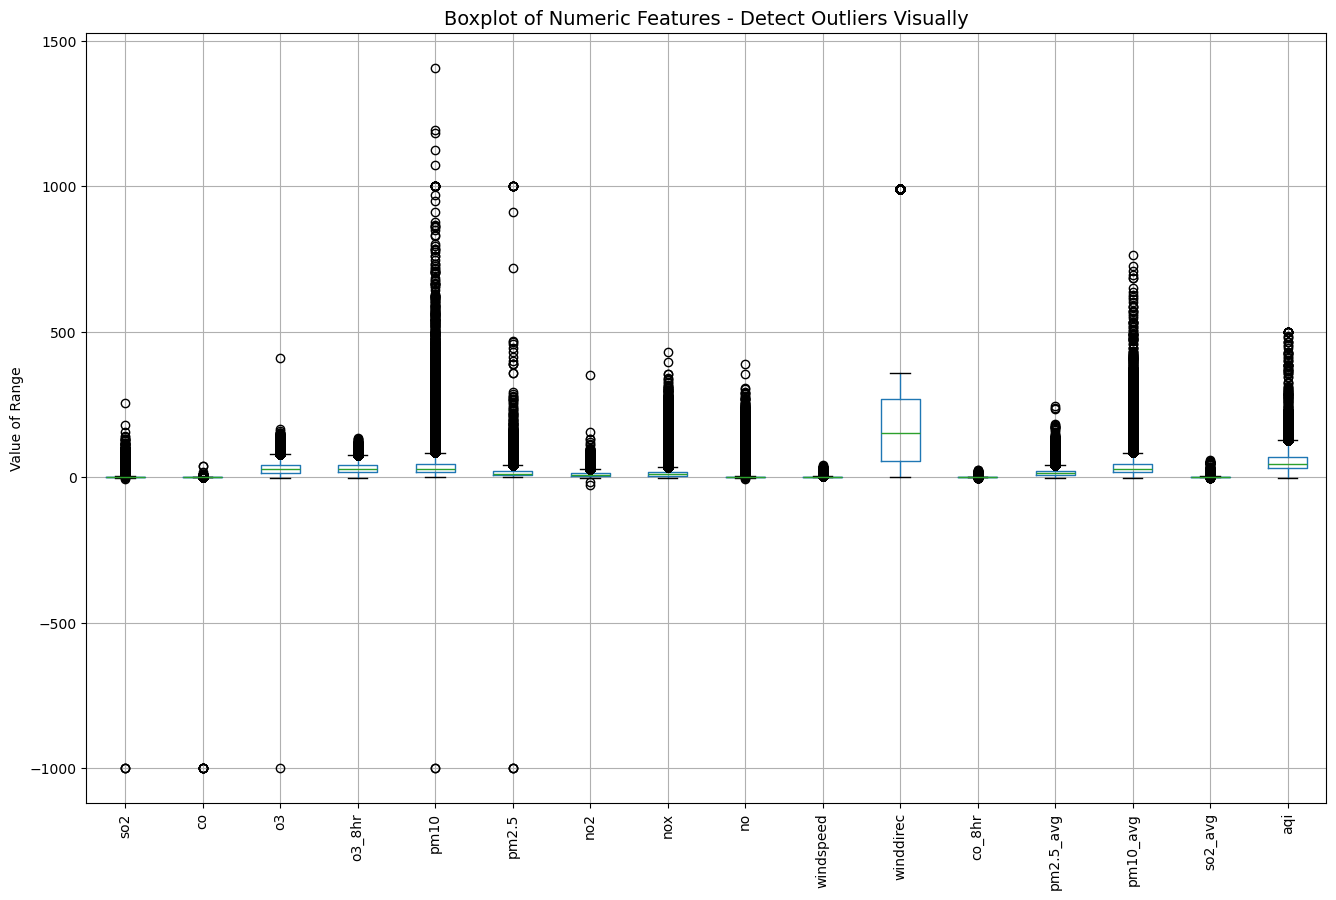

In [25]:
plt.figure(figsize = (16, 10))
df_numeric.boxplot(rot = 90)
plt.title("Boxplot of Numeric Features - Detect Outliers Visually", fontsize = 14)
plt.ylabel("Value of Range")
plt.show()

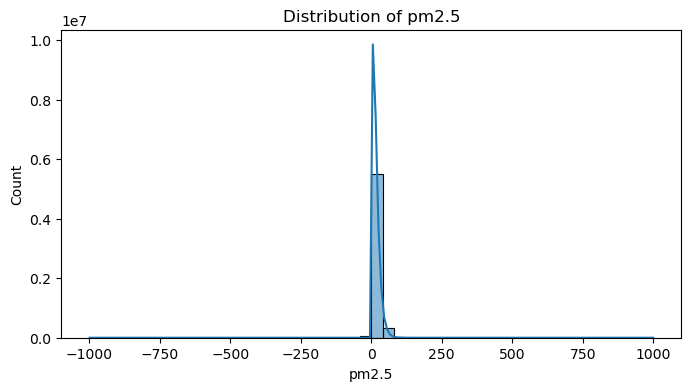

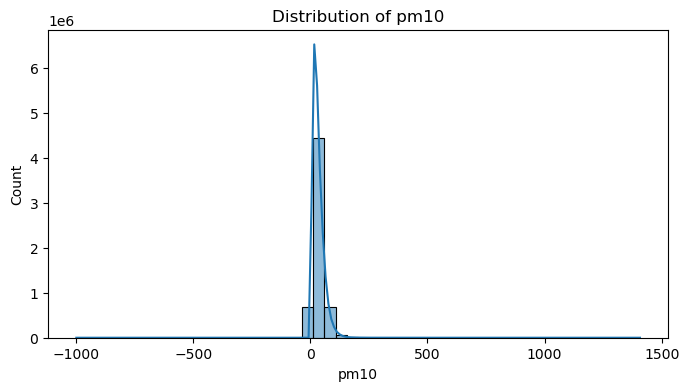

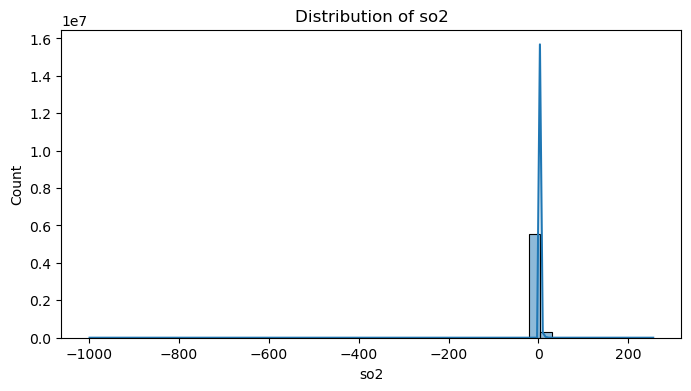

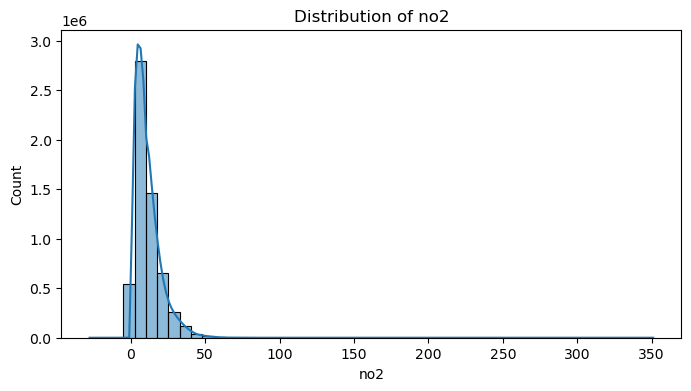

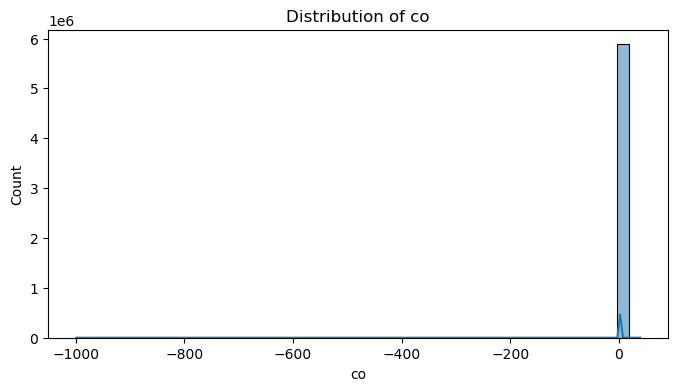

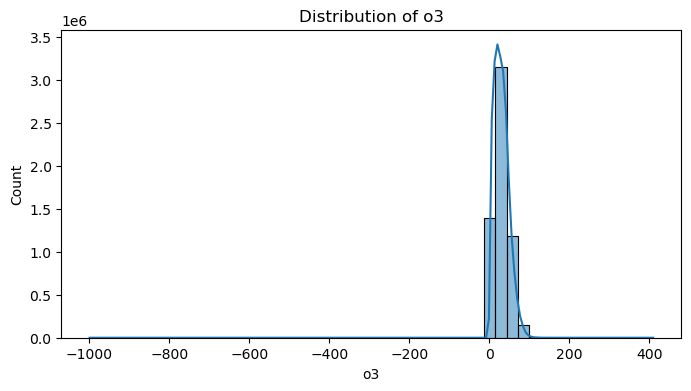

In [26]:
key_features = ['pm2.5', 'pm10', 'so2', 'no2', 'co', 'o3']

for feature in key_features:
    plt.figure(figsize = (8, 4))
    sns.histplot(df_numeric[feature], bins = 50, kde = True)
    plt.title(f"Distribution of {feature}")
    plt.show()

In [27]:
# Columns with noticeable outliers
high_outlier_cols = [
    'no', 'so2_avg', 'nox', 'co', 'so2', 'windspeed',
    'pm2.5', 'co_8hr', 'no2', 'pm10'
]

# IQR-Based Capping
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.01)
    Q3 = df[column].quantile(0.99)
    df[column] = np.where(df[column] < Q1, Q1, df[column])
    df[column] = np.where(df[column] > Q3, Q3, df[column])

for col in high_outlier_cols:
    cap_outliers(df, col)


# Log Transformation
log_transform_cols = ['pm2.5', 'pm10', 'co', 'so2', 'no2', 'nox']

for col in log_transform_cols:
    df[col + '_log'] = np.log1p(df[col])


# Recompute IQR outliers after capping
iqr_post = {}
for col in high_outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    iqr_post[col] = ((df[col] < lower) | (df[col] > upper)).sum()

iqr_post_df = pd.DataFrame({
    'Column': high_outlier_cols,
    'Remaining IQR Outliers': iqr_post.values()
}).sort_values(by='Remaining IQR Outliers', ascending=False)

display(iqr_post_df)

,Column,Remaining IQR Outliers
0,no,653491
1,so2_avg,381486
2,nox,374339
3,co,290302
4,so2,278648
5,windspeed,276272
6,pm2.5,242713
7,co_8hr,238952
8,no2,238430
9,pm10,221228


In [28]:
# Select numerical columns where outliers were detected
num_cols = ['no', 'so2_avg', 'nox', 'co', 'so2', 'windspeed', 
            'pm2.5', 'co_8hr', 'no2', 'pm10']

# Function to cap outliers using IQR method
def cap_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Winsorization (Capping)
    df[col] = np.where(df[col] < lower_limit, lower_limit,
                       np.where(df[col] > upper_limit, upper_limit, df[col]))
    return df

# Apply capping for each column
for col in num_cols:
    df = cap_outliers_iqr(df, col)

print("Outlier handling completed using IQR capping method.")

# Verify remaining outliers after capping
remaining_outliers = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower_limit) | (df[col] > upper_limit)).sum()
    remaining_outliers[col] = outliers

# Convert to DataFrame for better display
remaining_outliers_df = pd.DataFrame(list(remaining_outliers.items()), columns=['Column', 'Remaining IQR Outliers'])
display(remaining_outliers_df.sort_values(by='Remaining IQR Outliers', ascending=False))

Outlier handling completed using IQR capping method.


,Column,Remaining IQR Outliers
0,no,0
1,so2_avg,0
2,nox,0
3,co,0
4,so2,0
5,windspeed,0
6,pm2.5,0
7,co_8hr,0
8,no2,0
9,pm10,0


In [29]:
df = df.reset_index()

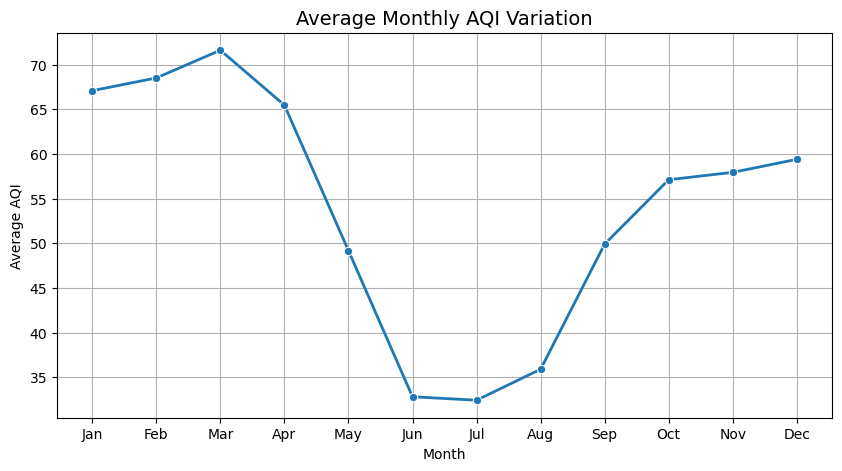

In [30]:
# Extract temporal features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df['season'] = df['month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
})

# Monthly AQI Variation
monthly_aqi =  df.groupby('month_name')['aqi'].mean().reindex(list(calendar.month_abbr)[1:])
plt.figure(figsize = (10, 5))
sns.lineplot(x = monthly_aqi.index, y = monthly_aqi.values, marker = 'o', linewidth = 2)
plt.title("Average Monthly AQI Variation", fontsize = 14)
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.grid(True)
plt.show()

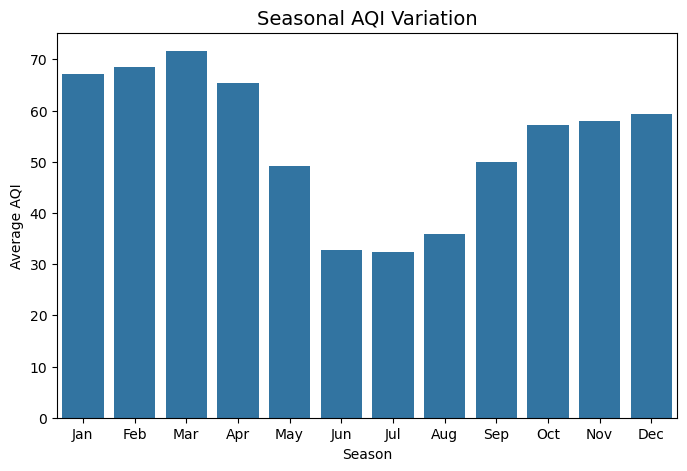

In [31]:
# Seasonal AQI Variation
seasonal_aqi = df.groupby('month_name')['aqi'].mean().reindex(list(calendar.month_abbr)[1:])
plt.figure(figsize = (8, 5))
sns.barplot(x = seasonal_aqi.index, y = seasonal_aqi.values)
plt.title("Seasonal AQI Variation", fontsize = 14)
plt.xlabel("Season")
plt.ylabel("Average AQI")
plt.show()

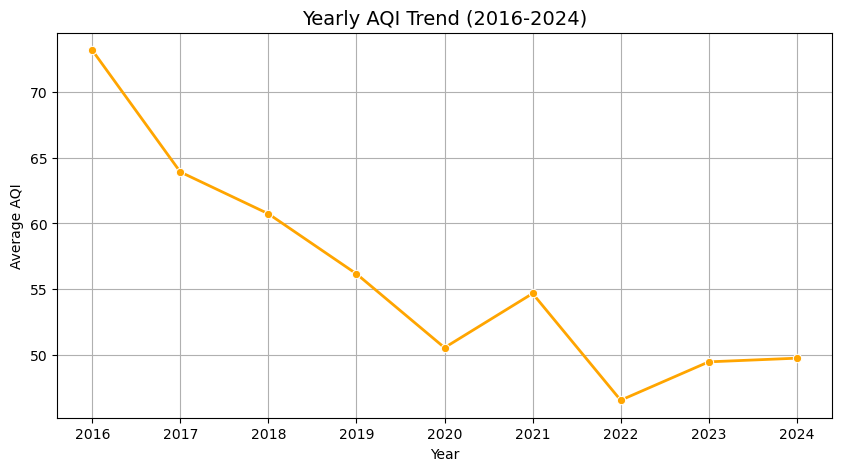

In [32]:
# Yearly AQI Trend
yearly_aqi = df.groupby('year')['aqi'].mean().sort_index()
plt.figure(figsize = (10, 5))
sns.lineplot(x = yearly_aqi.index, y = yearly_aqi.values, marker = 'o', linewidth = 2, color = 'orange')
plt.title("Yearly AQI Trend (2016-2024)", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Average AQI")
plt.grid(True)
plt.show()

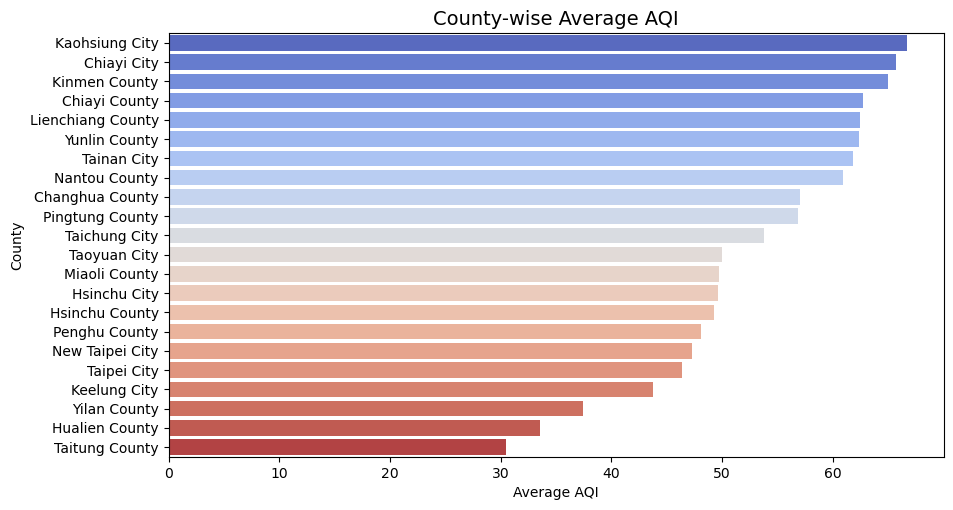

In [33]:
# County AQI Trend
county_aqi = df.groupby('county')['aqi'].mean().reset_index().sort_values(by = 'aqi', ascending = False)
plt.figure(figsize = (10, len(county_aqi) / 4))
sns.barplot(y = 'county', x = 'aqi', data = county_aqi, palette = 'coolwarm')
plt.title("County-wise Average AQI", fontsize = 14)
plt.xlabel("Average AQI")
plt.ylabel("County")
plt.show()

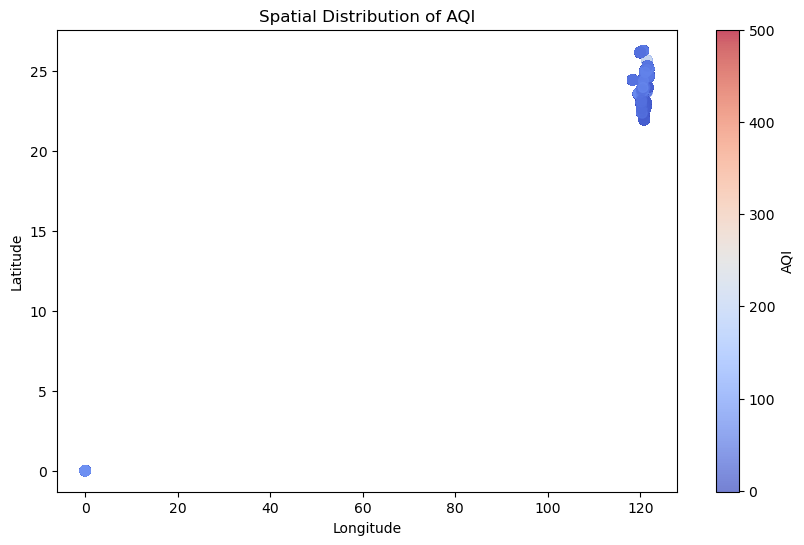

In [34]:
# Geographic Heatmap
plt.figure(figsize = (10, 6))
sc = plt.scatter(
    df['longitude'],
    df['latitude'],
    c = df['aqi'],
    cmap = 'coolwarm',
    alpha = 0.7,
    s = 50
)

# Add a colorbar based on the scatter object
cbar = plt.colorbar(sc)
cbar.set_label('AQI')

plt.title("Spatial Distribution of AQI")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

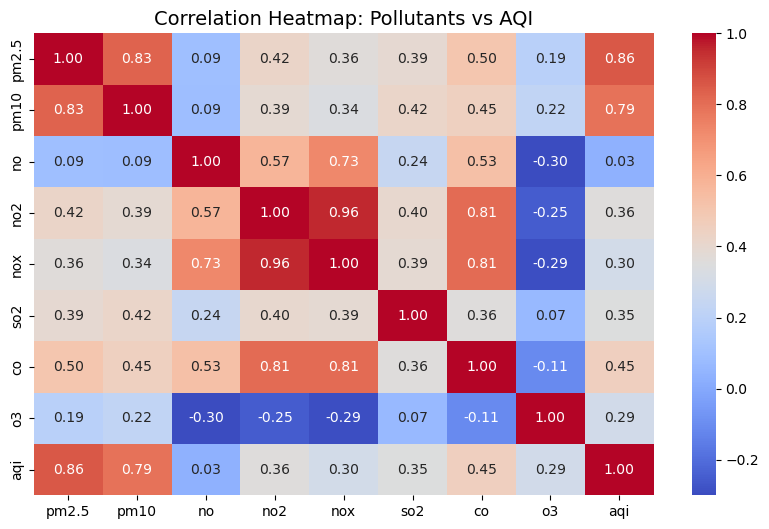

In [35]:
pollutants = ['pm2.5', 'pm10', 'no', 'no2', 'nox', 'so2', 'co', 'o3', 'aqi']

corr_matrix = df[pollutants].corr()

plt.figure(figsize = (10, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title("Correlation Heatmap: Pollutants vs AQI", fontsize = 14)
plt.show()

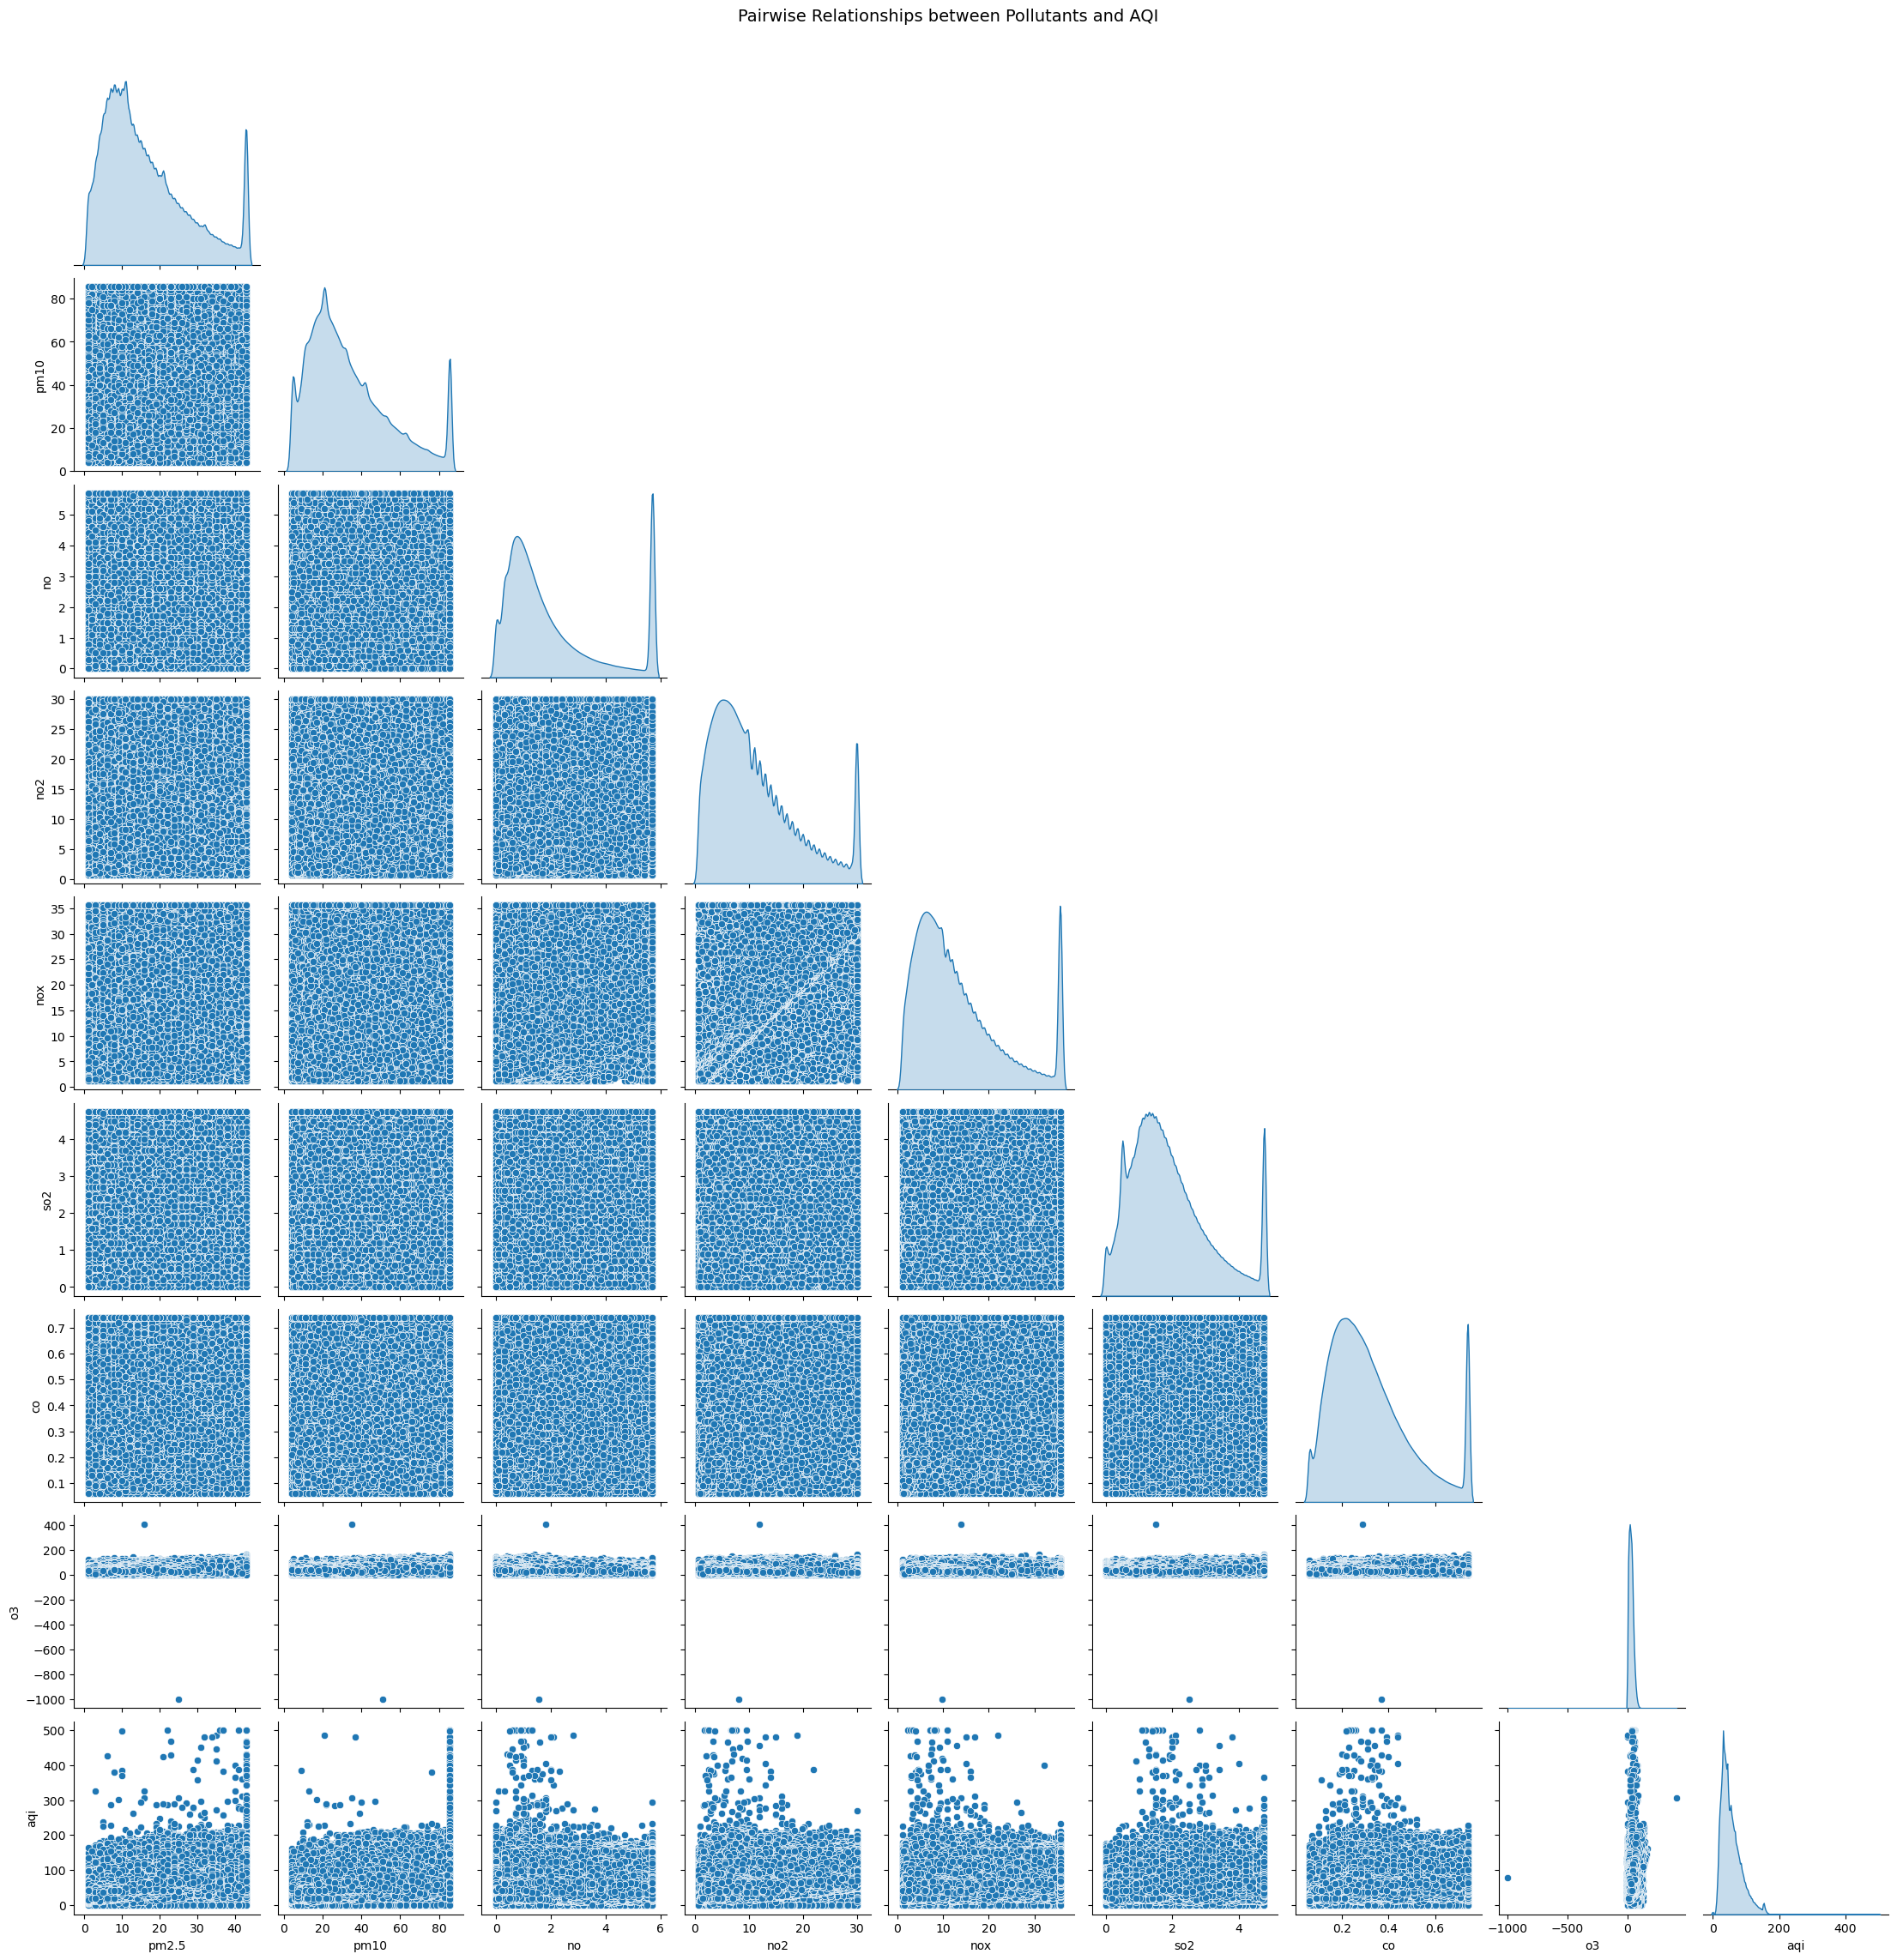

In [36]:
# Pairplot for relationships between pollutants and AQI
sns.pairplot(df[pollutants], diag_kind = 'kde', corner = True)
plt.suptitle("Pairwise Relationships between Pollutants and AQI", y = 1.02, fontsize = 14)
plt.show()

In [37]:
# Extract temporal features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['dayofweek'] = df['date'].dt.dayofweek
df['quarter'] = df['date'].dt.quarter
df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x>= 5 else 0)

# Sort by date for time-based features
df = df.sort_values(by = ['sitename', 'date'])

# Create lag features for pollutants (previous day values)
for col in ['pm2.5', 'pm10', 'so2', 'no2', 'co', 'o3', 'aqi']:
    df[f'{col}_lag1'] = df.groupby('sitename')[col].shift(1)
    df[f'{col}_lag3'] = df.groupby('sitename')[col].shift(3)
    df[f'{col}_lag7'] = df.groupby('sitename')[col].shift(7)

# Rolling averages (trend indicators)
for col in ['pm2.5', 'pm10', 'so2', 'no2', 'co', 'o3']:
    df[f'{col}_rolling3'] = df.groupby('sitename')[col].transform(lambda x: x.rolling(3).mean())
    df[f'{col}_rolling7'] = df.groupby('sitename')[col].transform(lambda x: x.rolling(7).mean())

# Pollution Interaction Features
df['pm_ratio'] = df['pm2.5'] / (df['pm10'] + 1e-5)
df['oxides_ratio'] = df['no2'] / (df['so2'] + 1e-5)
df['combine_pollution'] = df[['pm2.5', 'pm10', 'so2', 'no2', 'co', 'o3']].sum(axis = 1)

# Encode 'status', 'pollutant', 'county', and 'sitename'
label_cols = ['status', 'season', 'county', 'sitename', 'month_name']
encoder = LabelEncoder()

for col in label_cols:
    if col in df.columns: 
        df[col] = df[col].astype(str)
        df[col] = encoder.fit_transform(df[col])

# Select numerical columns to scale
num_cols = [col for col in df.select_dtypes(include = ['float64', 'int64']).columns if col not in label_cols]

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Drop rows with NaNs created by lag/rolling
df = df.dropna().reset_index(drop = True)

print(f"Final shape of data: {df.shape}")
df.head()

Final shape of data: (5881282, 73)


,date,sitename,county,aqi,status,so2,co,o3,o3_8hr,pm10,pm2.5,no2,nox,no,windspeed,winddirec,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid,year,pm2.5_log,pm10_log,co_log,so2_log,no2_log,nox_log,month,month_name,season,day,dayofweek,quarter,is_weekend,pm2.5_lag1,pm2.5_lag3,pm2.5_lag7,pm10_lag1,pm10_lag3,pm10_lag7,so2_lag1,so2_lag3,so2_lag7,no2_lag1,no2_lag3,no2_lag7,co_lag1,co_lag3,co_lag7,o3_lag1,o3_lag3,o3_lag7,aqi_lag1,aqi_lag3,aqi_lag7,pm2.5_rolling3,pm2.5_rolling7,pm10_rolling3,pm10_rolling7,so2_rolling3,so2_rolling7,no2_rolling3,no2_rolling7,co_rolling3,co_rolling7,o3_rolling3,o3_rolling7,pm_ratio,oxides_ratio,combine_pollution
0,2016-11-25 20:00:00,0,16,-0.173586,0,0.607810,0.400845,0.297899,1.744597,1.995803,0.155576,0.793173,0.611804,-0.235831,-0.090543,1.200747,0.569866,-0.226719,0.312990,-0.497599,-0.659575,-0.996934,-0.118505,2016,0.429115,1.461930,0.357314,0.680185,0.883636,0.729594,11,9,0,25,4,4,-0.633018,0.427933,0.246357,0.246357,1.274957,1.130769,0.938514,0.692889,0.522693,0.863016,0.401431,-0.186179,-0.199261,0.342232,-0.302431,-0.361052,1.113243,1.765513,1.493768,-0.173588,-0.307540,-0.073114,0.192872,0.251262,1.543151,1.349124,0.641223,0.544064,0.419042,-0.020256,0.274898,-0.167250,1.022413,1.545792,-0.873096,-0.083228,1.327260
1,2016-11-25 21:00:00,0,16,-0.173586,0,0.948170,1.162714,-0.354377,1.744597,2.284137,0.609511,1.315487,1.040341,-0.178057,-1.017362,-1.256221,0.569866,-0.226719,0.358321,-0.497599,-0.659575,-0.996934,-0.118505,2016,0.753005,1.575172,0.978625,0.926222,1.168131,0.981118,11,9,0,25,4,4,-0.633018,0.155573,-0.026001,-0.025998,1.995788,1.226879,0.986568,0.607799,0.522693,0.437569,0.793165,0.009687,-0.408184,0.400837,0.049198,-0.478261,0.297901,1.548090,1.656834,-0.173588,-0.240565,-0.073114,0.412723,0.348996,1.905884,1.546325,0.790836,0.625670,0.873391,0.252645,0.661247,0.091154,0.365124,1.221508,-0.736722,-0.083223,1.411553
2,2016-11-25 22:00:00,0,16,-0.173586,0,0.437630,0.693871,-0.517446,1.744597,2.091914,0.609511,1.054330,0.826072,-0.235831,-0.090543,1.226885,0.569866,-0.226719,0.448985,-0.497599,-0.659575,-0.996934,-0.118505,2016,0.753005,1.500642,0.602897,0.546709,1.033008,0.861081,11,9,0,25,4,4,-0.633018,0.609507,0.427929,0.791065,2.284121,1.274934,1.034622,0.948158,0.692872,0.182301,1.315478,0.401420,-0.421241,1.162705,0.342223,-0.595470,-0.354372,1.113244,1.493768,-0.173588,-0.173589,-0.173576,0.475538,0.321072,2.186177,1.707006,0.701069,0.666473,1.100566,0.486264,0.783252,0.294186,-0.198266,0.897224,-0.690953,-0.083213,1.180403
3,2016-11-25 23:00:00,0,16,-0.173586,0,0.097271,0.459450,-0.571802,1.744597,1.371080,0.518724,0.662594,0.504670,-0.120283,-0.874774,1.462126,0.569866,-0.140198,0.494317,-0.497599,-0.659575,-0.996934,-0.118505,2016,0.693999,1.182351,0.407130,0.254430,0.802602,0.658832,11,9,0,25,4,4,-0.633018,0.609507,0.155571,0.064787,2.091899,1.995759,1.226839,0.437619,0.607782,0.437569,1.054322,0.793153,-0.316780,0.693863,0.400828,-0.478261,-0.517441,0.297908,1.711190,-0.173588,-0.173589,-0.307526,0.601167,0.390881,1.971835,1.728918,0.521533,0.612069,1.055131,0.641322,0.803586,0.441846,-0.498741,0.529117,-0.516766,-0.083212,0.692312
4,2016-11-26 00:00:00,0,16,-0.173586,0,0.692900,0.928293,-0.789228,1.744597,0.602191,-0.661509,0.923751,0.718938,0.168587,-0.874774,-1.047118,0.569866,-0.140198,0.494317,-0.497599,-0.659575,-0.996934,-0.118505,2016,-0.460769,0.745712,0.793300,0.744167,0.960289,0.796903,11,9,0,26,5,4,1.579734,0.518720,0.609501,0.246357,1.371068,2.284090,1.130731,0.097260,0.948141,0.522658,0.662587,1.315463,-0.186203,0.459443,1.162691,-0.302448,-0.571797,-0.354360,1.765545,-0.173588,-0.173589,-0.307526,0.161465,0.251262,1.394761,1.648577,0.431765,0.639271,0.918826,0.817053,0.722250,0.635649,-0.648978,0.117188,-1.010701,-0.083227,-0.029318


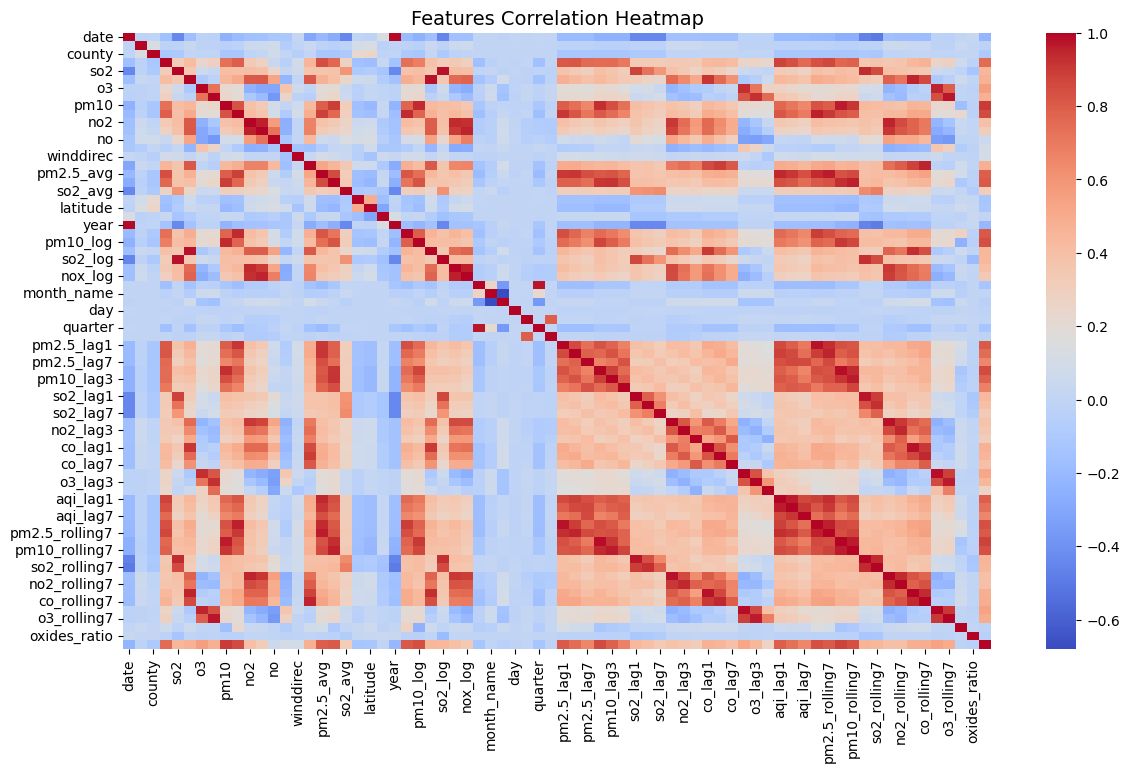

In [38]:
target_col = 'aqi'
feature_cols = [col for col in df.columns if col != target_col]

X = df[feature_cols]
y = df[target_col]

# Correlation Analysis
feature_corr_matrix = df[feature_cols].corr()

# Plot correlation heatmap
plt.figure(figsize = (14, 8))
sns.heatmap(feature_corr_matrix, cmap = 'coolwarm', annot = False)
plt.title("Features Correlation Heatmap", fontsize = 14)
plt.show()

In [39]:
# Remove highly correlated features (|corr| > 0.85)
high_corr_features = set()
cor_threshold = 0.85

for i in range(len(feature_corr_matrix.columns)):
    for j in range(i):
        if abs(feature_corr_matrix.iloc[i, j]) > cor_threshold:
            high_corr_features.add(feature_corr_matrix.columns[i])

print(f"Highly correlated features to remove: {list(high_corr_features)}")
df_reduced = df.drop(columns = list(high_corr_features), errors = 'ignore')

Highly correlated features to remove: ['aqi_lag1', 'o3_lag3', 'nox_log', 'o3_lag1', 'pm2.5_rolling3', 'aqi_lag7', 'combine_pollution', 'year', 'pm10_rolling3', 'pm2.5_log', 'pm2.5_lag3', 'co_lag3', 'co_rolling3', 'pm10_avg', 'o3_rolling7', 'no2_rolling7', 'co_log', 'so2_log', 'pm10_lag1', 'pm10_lag3', 'so2_rolling7', 'pm2.5_lag1', 'co_lag1', 'nox', 'no2_rolling3', 'so2_lag1', 'no2_log', 'pm2.5_avg', 'aqi_lag3', 'o3_rolling3', 'so2_rolling3', 'co_rolling7', 'no2_lag1', 'quarter', 'pm2.5_rolling7', 'pm10_rolling7', 'pm10_log']


In [40]:
# Statistical Feature Selection
X_reduced = df_reduced.drop(columns = ['aqi'], errors = 'ignore')
y = df_reduced['aqi']

# Remove datetime columns (they can't be used in numerical analysis)
datetime_cols = X_reduced.select_dtypes(include = ['datetime64']).columns
X_reduced = X_reduced.drop(columns = datetime_cols, errors = 'ignore')
X_reduced = X_reduced.select_dtypes(include = [np.number])

# Use ANOVA F-test and Mutual Information
f_test = SelectKBest(score_func = f_regression, k = min(20, X_reduced.shape[1]))
f_test.fit(X_reduced, y)
f_scores = pd.DataFrame({
    'Feature': X_reduced.columns,
    'F_Score': f_test.scores_,
}).sort_values(by = 'F_Score', ascending = False)

mi = mutual_info_regression(X_reduced, y, discrete_features = False, n_neighbors = 3)
mi_scores = pd.DataFrame({
    'Feature': X_reduced.columns,
    'Mutual_Info': mi
}).sort_values(by = 'Mutual_Info', ascending = False)

# Display top 10 features
print("\nTop 10 Features by ANOVA F-test:\n", f_scores.head(10))
print("\nTop 10 Features by Mutual Information:\n", mi_scores.head(10))


Top 10 Features by ANOVA F-test:
        Feature       F_Score
2       status  2.238356e+07
8        pm2.5  1.625241e+07
24  pm2.5_lag7  1.234587e+07
7         pm10  9.873413e+06
25   pm10_lag7  8.557608e+06
13      co_8hr  1.927027e+06
4           co  1.524827e+06
30     co_lag7  1.498981e+06
28    no2_lag3  9.230843e+05
26    so2_lag3  9.123673e+05

Top 10 Features by Mutual Information:
        Feature  Mutual_Info
2       status     0.938323
6       o3_8hr     0.782841
32    pm_ratio     0.764871
8        pm2.5     0.709083
24  pm2.5_lag7     0.584899
7         pm10     0.494571
25   pm10_lag7     0.452356
13      co_8hr     0.203439
31     o3_lag7     0.184942
4           co     0.176143


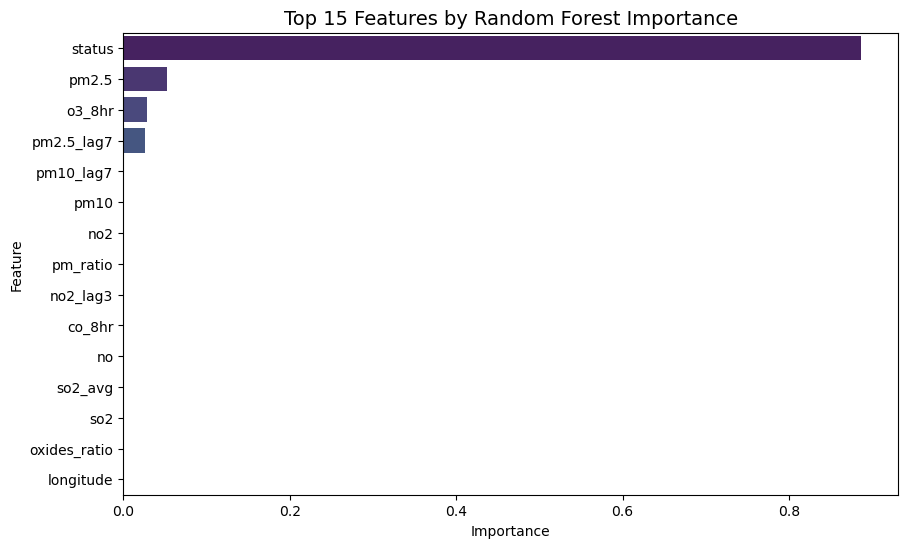

In [41]:
# Model-Based Feature Importance
rf = RandomForestRegressor(n_estimators = 50, max_depth = 10, n_jobs = -1, random_state = 42)
rf.fit(X_reduced, y)

importances = pd.DataFrame({
    'Feature': X_reduced.columns,
    'Importance': rf.feature_importances_
}).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (10, 6))
sns.barplot(data = importances.head(15), x = 'Importance', y = 'Feature', palette = 'viridis')
plt.title("Top 15 Features by Random Forest Importance", fontsize = 14)
plt.show()

In [42]:
# Lasso for feature selection
lasso = LassoCV(cv = 3, n_alphas = 50, max_iter = 2000, random_state = 42)
lasso.fit(X_reduced, y)

lasso_importance = pd.DataFrame({
    'Feature': X_reduced.columns,
    'Coefficient': lasso.coef_
})
lasso_importance = lasso_importance[lasso_importance['Coefficient'] != 0]

print("Lasso selected features:\n", lasso_importance)

Lasso selected features:
        Feature  Coefficient
0     sitename     0.000058
1       county    -0.000336
2       status     0.282916
3          so2    -0.010135
5           o3     0.002703
6       o3_8hr     0.121706
7         pm10     0.028797
8        pm2.5     0.316550
9          no2    -0.026923
10          no     0.007576
12   winddirec    -0.000059
13      co_8hr     0.054315
14     so2_avg    -0.006615
15   longitude    -0.001776
16    latitude    -0.006491
18       month    -0.001374
19  month_name     0.001876
20      season     0.010637
21         day    -0.000270
22   dayofweek     0.002091
24  pm2.5_lag7     0.202590
25   pm10_lag7     0.066151
26    so2_lag3     0.022508
27    so2_lag7    -0.014206
28    no2_lag3     0.030792
29    no2_lag7    -0.002461
30     co_lag7    -0.008899
32    pm_ratio    -0.025323


In [43]:
selected_features = list(
    set(f_scores.head(15)['Feature']) |
    set(mi_scores.head(15)['Feature']) |
    set(importances.head(15)['Feature']) |
    set(lasso_importance['Feature'])
)

print("Final selected features for modeling:\n", selected_features)

X_final = X_reduced[selected_features]

Final selected features for modeling:
 ['day', 'dayofweek', 'winddirec', 'pm10', 'so2_lag7', 'oxides_ratio', 'pm2.5', 'so2_lag3', 'co', 'no2_lag3', 'month', 'no2', 'pm_ratio', 'month_name', 'co_8hr', 'pm10_lag7', 'o3_8hr', 'no', 'sitename', 'so2', 'o3_lag7', 'o3', 'co_lag7', 'no2_lag7', 'latitude', 'county', 'pm2.5_lag7', 'status', 'season', 'longitude', 'so2_avg']


In [44]:
# Use selected features
X_final = X_reduced[selected_features].copy()
y = df_reduced['aqi']

# Ensure all are numeric
X_final = X_final.select_dtypes(include = [np.number])

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size = 0.2, random_state = 42
)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (4705025, 31)
Testing data shape: (1176257, 31)


In [47]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001, max_iter=2000),
    "Random Forest": RandomForestRegressor(
        n_estimators=100,     
        max_depth=10,         
        random_state=42,
        n_jobs=-1,            
        min_samples_split=5,
        min_samples_leaf=3
    ),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=150,     
        learning_rate=0.05,   
        max_depth=4,
        random_state=42
    ),
    "Support Vector Regressor": SVR(kernel='rbf', C=5, epsilon=0.2)
}

# K-Fold cross-validation setup
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Train & Evaluate
results = []
n = len(X_train)

for name, model in models.items():
    print(f"\n🚀 Training {name}...")
    
    # For SVR or other heavy models, use a small subset if dataset is large
    if name == "Support Vector Regressor" and n > 50000:
        sample_idx = np.random.choice(X_train.index, size=50000, replace=False)
        X_train_sub, y_train_sub = X_train.loc[sample_idx], y_train.loc[sample_idx]
    else:
        X_train_sub, y_train_sub = X_train, y_train
    
    # Train model
    model.fit(X_train_sub, y_train_sub)
    y_pred = model.predict(X_test)
    
    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Cross-validation (only for lightweight models)
    if name in ["Linear Regression", "Ridge Regression", "Lasso Regression"]:
        cv_r2 = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='r2', n_jobs=-1))
    else:
        cv_r2 = None  # Skip for heavier models to save time
    
    results.append({
        'Model': name,
        'MAE': mae,
        'RMSE': rmse,
        'R2_Score': r2,
        'CV_R2': cv_r2
    })



🚀 Training Linear Regression...

🚀 Training Ridge Regression...

🚀 Training Lasso Regression...

🚀 Training Random Forest...

🚀 Training Gradient Boosting...

🚀 Training Support Vector Regressor...


,Model,MAE,RMSE,R2_Score,CV_R2
4,Gradient Boosting,0.144327,0.205820,0.957684,NaN
3,Random Forest,0.139690,0.206623,0.957354,NaN
5,Support Vector Regressor,0.205831,0.305252,0.906923,NaN
1,Ridge Regression,0.221391,0.319421,0.898082,0.898088
0,Linear Regression,0.221391,0.319421,0.898082,0.898088
2,Lasso Regression,0.221270,0.319498,0.898032,0.898034


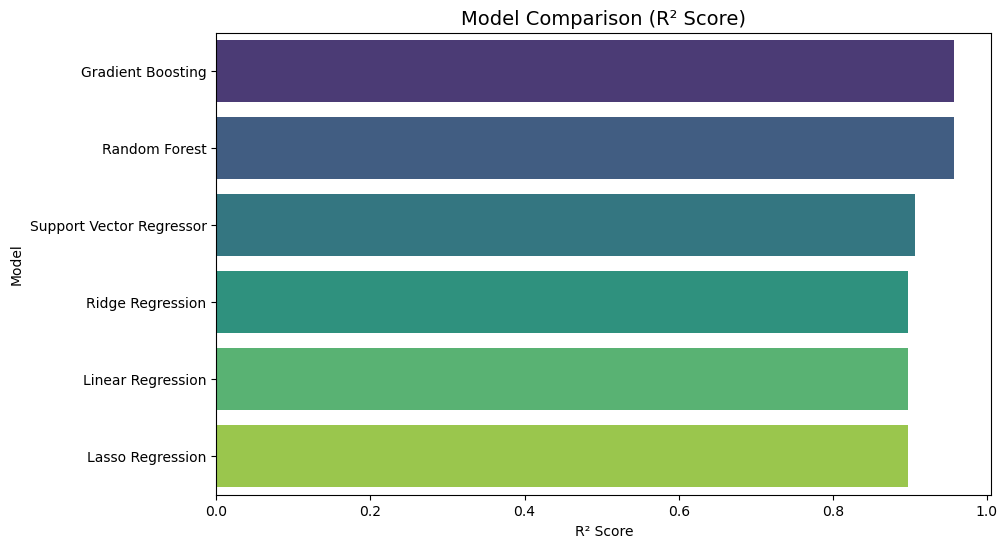

In [48]:
# Model Comparison
results_df = pd.DataFrame(results).sort_values(by = 'R2_Score', ascending = False)
display(results_df)

plt.figure(figsize = (10, 6))
sns.barplot(data = results_df, x = 'R2_Score', y = 'Model', palette = 'viridis')
plt.title("Model Comparison (R² Score)", fontsize = 14)
plt.xlabel('R² Score')
plt.ylabel('Model')
plt.show()

In [50]:
# Save best model
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

joblib.dump(best_model, f"best_model_{best_model_name.replace(' ', '_').lower()}.pkl")
print(f"\n Best model saved as: best_model_{best_model_name.replace(' ', '_').lower()}.pkl")


 Best model saved as: best_model_gradient_boosting.pkl



Model Performance on Test Set:
MAE: 0.1443
RMSE: 0.2058
R²: 0.9577


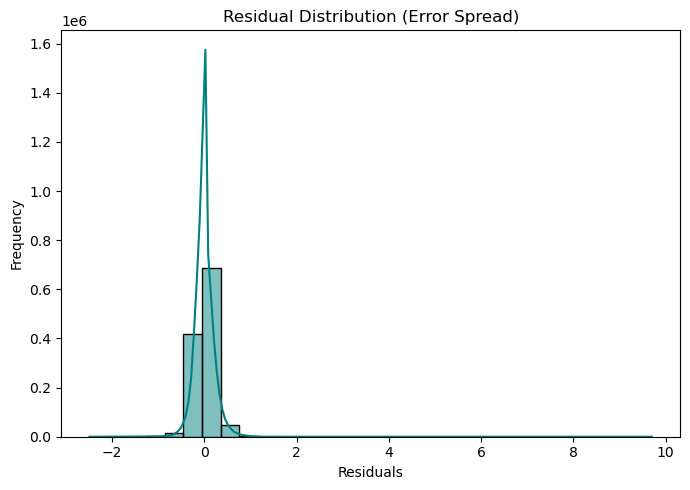

In [51]:
# Residual Analysis
y_pred = best_model.predict(X_test)
residuals = y_test - y_pred

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance on Test Set:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# Residual Distribution
plt.figure(figsize = (7, 5))
sns.histplot(residuals, bins = 30, kde = True, color = 'teal')
plt.title("Residual Distribution (Error Spread)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

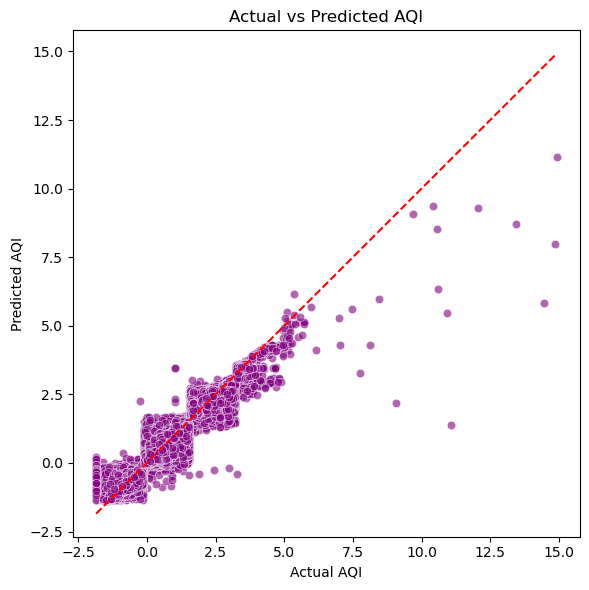

In [53]:
# Actual vs Predicted
plt.figure(figsize = (6, 6))
sns.scatterplot(x = y_test, y = y_pred, alpha = 0.6, color = 'purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'r--')
plt.title("Actual vs Predicted AQI")
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.tight_layout()
plt.show()

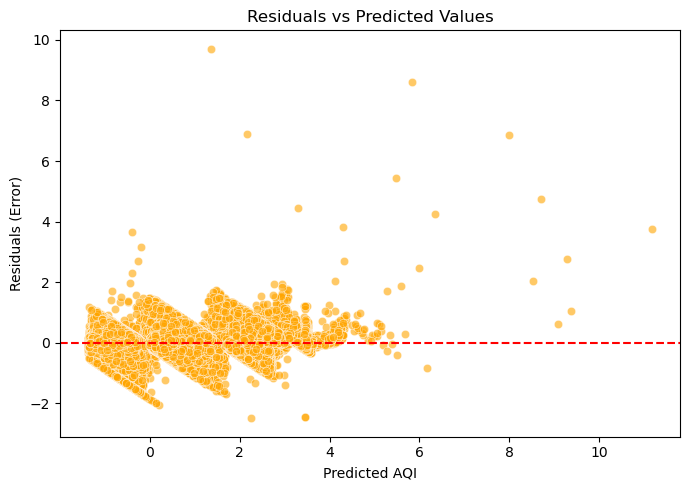

In [57]:
# Residuals vs Predicted
plt.figure(figsize = (7, 5))
sns.scatterplot(x = y_pred, y = residuals, alpha = 0.6, color = 'orange')
plt.axhline(0, linestyle = '--', color = 'red')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted AQI")
plt.ylabel("Residuals (Error)")
plt.tight_layout()
plt.show()

Air Quality Index (AQI) Prediction System | Machine Learning Project

Developed a comprehensive end-to-end machine learning pipeline to predict air quality levels across Indian regions from 2016–2024. The project involved data preprocessing, exploratory data analysis (EDA), feature engineering, and predictive modeling using Scikit-learn and Python.

•	Conducted in-depth EDA to analyze seasonal, temporal, and spatial pollution trends and visualize pollutant correlations through advanced data visualization tools like Matplotlib and Seaborn.
 
•	Implemented feature engineering techniques such as lag and rolling features, pollutant ratios, and one-hot/label encoding to enhance model performance.
 
•	Applied statistical and model-based feature selection methods (ANOVA F-test, Mutual Information, Lasso, Random Forest) to identify the most influential variables.
 
•	Trained and optimized multiple regression models — Linear Regression, Ridge, Lasso, Random Forest, and Gradient Boosting — achieving strong predictive accuracy and interpretability.
